In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: title={'center': 'Classes destribution'}, xlabel='Survived', ylabel='count'>

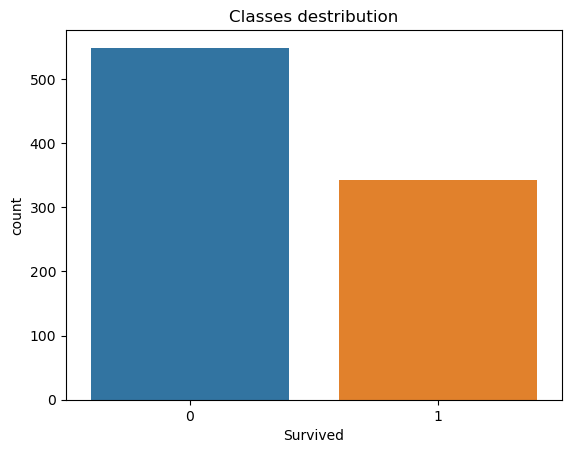

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Classes destribution')
sns.countplot(data=train, x='Survived')

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: xlabel='Parch', ylabel='Age'>

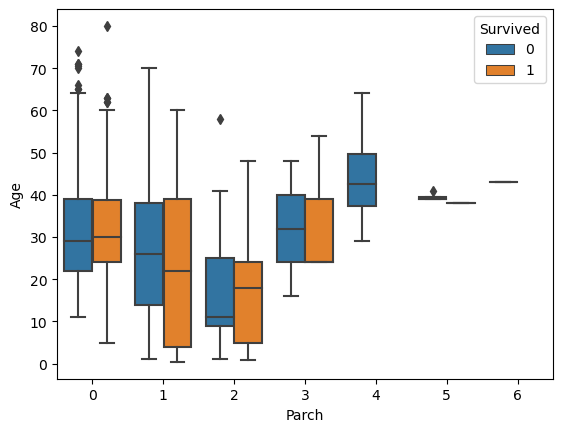

In [6]:
sns.boxplot(data=train, x='Parch', y='Age', hue='Survived')

/tmp/ipykernel_32/322013098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr().round(2)


<Axes: >

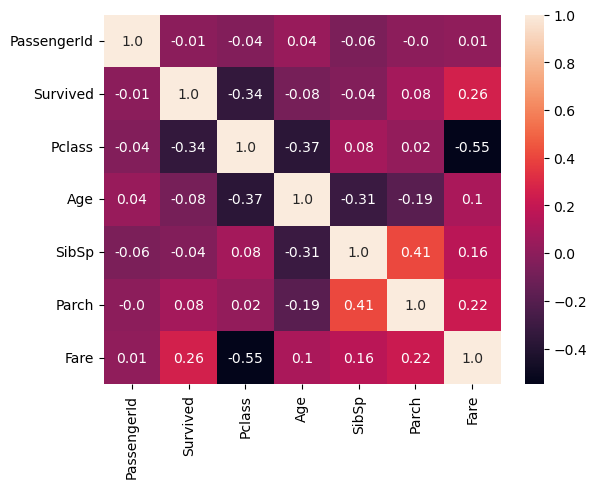

In [7]:
corr = train.corr().round(2)
sns.heatmap(data=corr, annot=True, fmt='.2')

In [8]:
from sklearn.preprocessing import OneHotEncoder

cols_for_oh = ['Embarked', 'Sex']
oh = OneHotEncoder()
oh_encoded_train = oh.fit_transform(train[cols_for_oh])
oh_encoded_test = oh.transform(test[cols_for_oh])
oh_cols_generated = oh.get_feature_names_out()

oh_encoded_train_df = train.copy()
oh_encoded_test_df = test.copy()
oh_encoded_train_df[oh_cols_generated] = pd.DataFrame(oh_encoded_train.toarray(), columns=oh_cols_generated)
oh_encoded_test_df[oh_cols_generated] = pd.DataFrame(oh_encoded_test.toarray(), columns=oh_cols_generated)
oh_encoded_train_df.drop(cols_for_oh, axis=1, inplace=True)
oh_encoded_test_df.drop(cols_for_oh, axis=1, inplace=True)
oh_encoded_train_df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
oh_encoded_train_df['Age_null'] = 0
oh_encoded_test_df['Age_null'] = 0
oh_encoded_train_df.loc[oh_encoded_train_df.Age.isna(), 'Age_null'] = 1
oh_encoded_test_df.loc[oh_encoded_test_df.Age.isna(), 'Age_null'] = 1
oh_encoded_train_df.loc[oh_encoded_train_df.Age.isna(), 'Age'] = oh_encoded_train_df.Age.median()
oh_encoded_test_df.loc[oh_encoded_test_df.Age.isna(), 'Age'] = oh_encoded_test_df.Age.median()

In [10]:
oh_encoded_train_df['cabin_count'] = oh_encoded_train_df['Cabin'].apply(lambda x: len(oh_encoded_train_df.loc[oh_encoded_train_df.Cabin==x]))
oh_encoded_test_df['cabin_count'] = oh_encoded_test_df['Cabin'].apply(lambda x: len(oh_encoded_test_df.loc[oh_encoded_test_df.Cabin==x]))
oh_encoded_train_df.drop('Cabin', axis=1, inplace=True)
oh_encoded_test_df.drop('Cabin', axis=1, inplace=True)
oh_encoded_train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male,Age_null,cabin_count
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0,0


/tmp/ipykernel_32/2748024491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = oh_encoded_train_df.corr().round(2)


<Axes: >

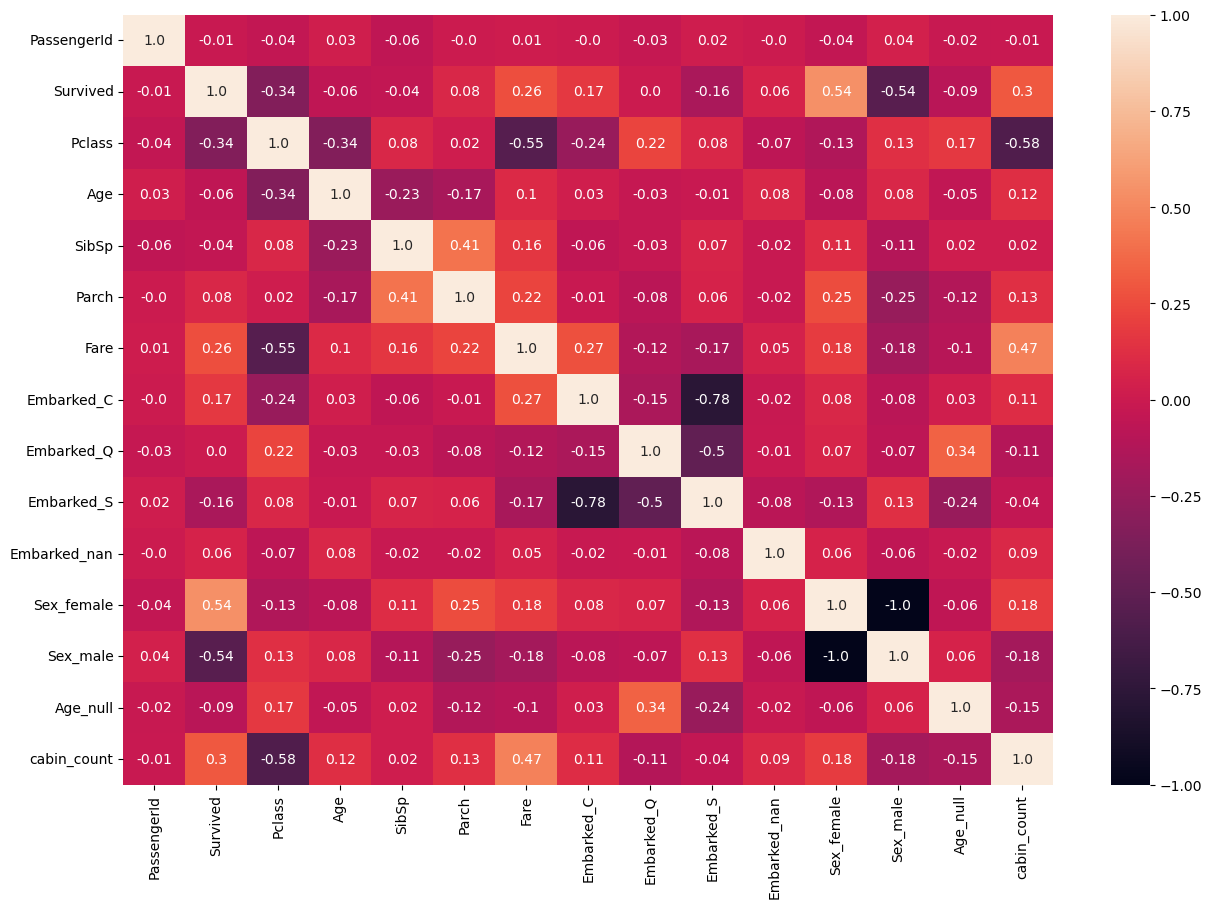

In [11]:
corr = oh_encoded_train_df.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr, annot=True, fmt='.2')

In [12]:
from sklearn.ensemble import RandomForestClassifier

feature_cols = oh_encoded_test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1).columns

X_train, X_test, y_train = oh_encoded_train_df[feature_cols], oh_encoded_test_df[feature_cols], oh_encoded_train_df['Survived']
y_test = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [13]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {
    'n_estimators': [100, 500, 1000, 5000, 10000],
    'random_state': [1]
}
model = RandomForestClassifier()
grid_search = GridSearchCV(model, parameters_grid)
grid_search.fit(X_train, y_train)


print(grid_search.best_score_)
print(grid_search.best_params_)

0.8025171050153788
{'n_estimators': 10000, 'random_state': 1}


In [14]:
print(X_test.isna().sum())

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            1
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
Sex_female      0
Sex_male        0
Age_null        0
cabin_count     0
dtype: int64


In [15]:
X_test.loc[X_test.Fare.isna(), 'Fare'] = float(X_test.Fare.mode())

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
rf = RandomForestClassifier(n_estimators=10000, random_state=1)

steps = [('scale', scaler), ('model', rf)]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
rf_pred = pipeline.predict(X_test)

In [17]:
print(classification_report(y_test['Survived'], rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       266
           1       0.75      0.76      0.75       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



Text(50.722222222222214, 0.5, 'groud_truth')

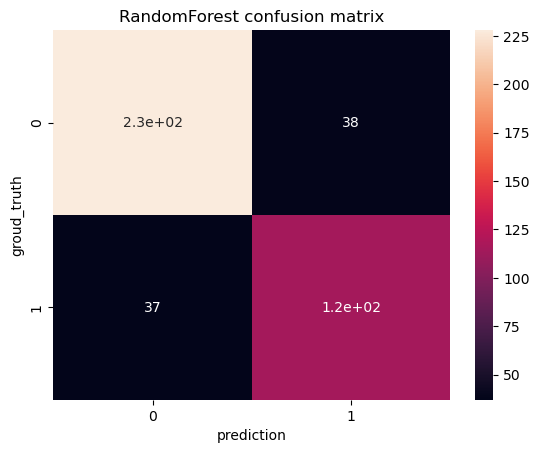

In [18]:
cm = confusion_matrix(y_test['Survived'], rf_pred)
sns.heatmap(cm, annot=True)

plt.title('RandomForest confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud_truth')